## Natural Language Processing (NLP) Model To Perform Sentiment Analysis On social Media

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import math
from wordcloud import WordCloud,STOPWORDS

ModuleNotFoundError: No module named 'torch'

In [2]:
#loading the dataset:

df = pd.read_csv("sentimentdataset.csv")

print(df.head(5))
print(df.info())

   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes     

### Input column for this sentimental analysis would be ['Text'] and output column would be ['Sentiment']
Lets observe the dataset further by shifting our focus to these particular columns:

In [ ]:
X , Y = df['Text'], df['Sentiment']
type(X), type(Y)
X.to_numpy(), Y.to_numpy()

print(f"The total number of samples are : {X.shape[0]}")


#train, test split
print(f"We will split the data into training and testing 80/20")
train_split = int(0.8 * X.shape[0])
#print(train_split)

X_train, y_train = X[:train_split], Y[:train_split]
X_test, y_test = X[train_split:], Y[train_split:]
#X_train.shape, y_train.shape, X_test.shape, y_test.shape


The total number of samples are : 732
We will split the data into training and testing 80/20


### exploring the training data

In [ ]:
classes, class_count = np.unique(y_train, return_counts = True)
print(f"total number of training examples : {len(y_train)}")
print(f"total number of classes : {len(classes)}")
print(f"Does it contain null values? {np.unique(Y.isnull())}")

total number of training examples : 585
total number of classes : 268
Does it contain null values? [False]


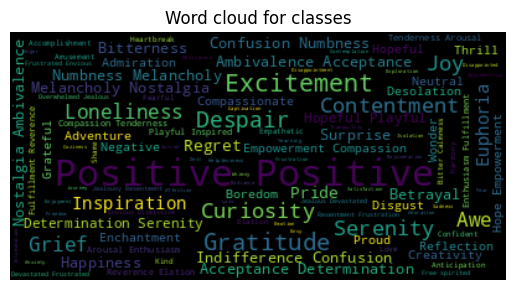

In [ ]:
text = ' '.join(y_train.astype(str).tolist())

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word cloud for classes")
plt.show()

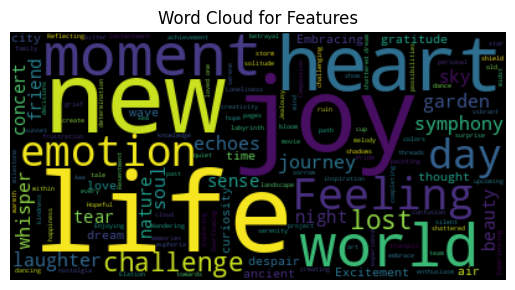

In [ ]:
text1 = ' '.join(X_train.astype(str).tolist())

wordcloud = WordCloud().generate(text1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Features")
plt.show()

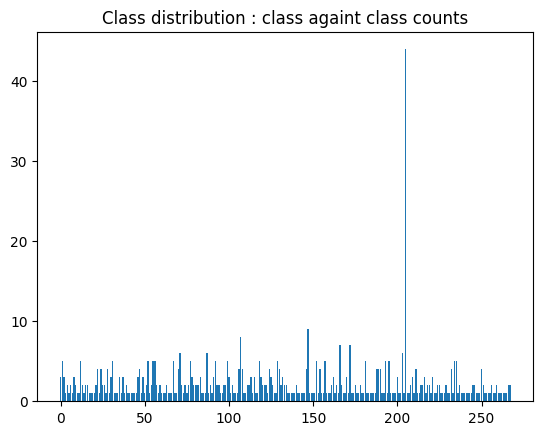

In [ ]:
#exploring class distribution

def plotting (x, y):
    plt.title("Class distribution : class againt class counts")
    plt.bar(x, y)
    plt.show()
labels = np.arange(0,268,1)
plotting(labels, class_count)

In [ ]:
max_class_count = max(class_count)
max_class_id = np.where(class_count == max_class_count)
max_class = classes[max_class_id[0][0]]

min_class_count = min(class_count)
min_class_id = np.where(class_count == min_class_count)
min_class = classes[min_class_id[0][0]]

print(f"Class with highest amount of data is '{max_class}' with a count of {max_class_count}, contributing {math.ceil((max_class_count / len(X_train)) * 100 )}% of the training examples")
print(f"Class with lowest amount of data have a count of {min_class_count}")

Class with highest amount of data is ' Positive  ' with a count of 44, contributing 8% of the training examples
Class with lowest amount of data have a count of 1


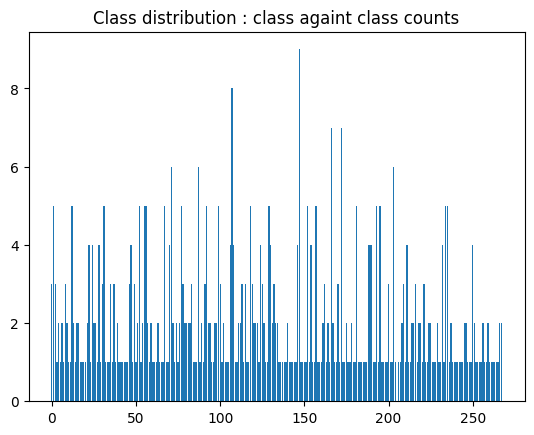

In [ ]:
#dropping class with max_count and plotting again
labels_copy = labels
class_count_copy = class_count
labels_copy = np.delete(labels_copy, max_class_id[0][0])
class_count_copy = np.delete(class_count_copy, max_class_id[0][0])
plotting(labels_copy, class_count_copy)

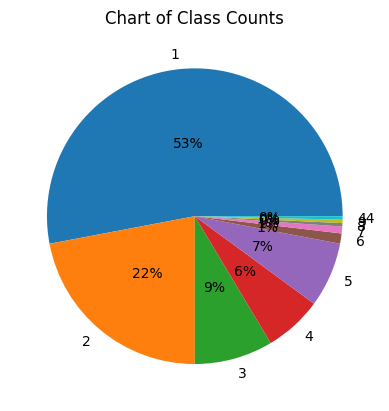

In [ ]:
#further observing the class counts
plt.title("Chart of Class Counts")
classes, class_counts_count = np.unique(class_count, return_counts = True)
plt.pie(class_counts_count, labels = classes, autopct='%1.0f%%', pctdistance=0.5)
plt.show()

the class distribution is definitely not even, with over 50% of the classes having only one training sample, the class with ' Positive ' forming about 8% of the training dataset